In [143]:
"""
Filename: SavagarDixon_CU_paper.ipynb
Authors: Anthony Savagar

The notebook derives results from Savagar and Dixon.

It manually enters the steady state value and Jacobian matrix as a numpy function. It then calculates the eigenvalues
and eigenvectors numerically. It then solves the model using the analytic solution, and plots these solutions.

"""
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import linalg as LA
from numpy import *
import numpy as np

# Steady State and Jacobian
* First define a function to solve for steady state using the by-hand derivations in the paper taking the parameter values as arguments.. 

* Second define a function to return the Jacobian matrix taking the parameter values as arguments.

In [144]:
def steady_state(alpha, beta, phi, gamma, A, sigma, rho, xi, eta, zeta):
    """
    Calculate the steady state for a given set of parameters.
    """
    n_ss = ( (beta)/(xi*(alpha+beta)**sigma) * ((A*(alpha/rho)**alpha)**(1+eta) \
         * ((1-(1-zeta)*(alpha+beta))/phi)**(1-(alpha+beta)+eta*(1-alpha)+beta*sigma)*(1-zeta)**(alpha*(1+eta) \
         + beta*(1-sigma)))**(1/beta) )**(1/(eta+sigma))
    
    K_ss = n_ss * (phi * alpha * (1 - zeta))/((1- (1 - zeta) * (alpha + beta)) * rho) 
    
    L_ss = n_ss * ((1/A) * (rho/(alpha*(1-zeta)))**(alpha) * ((phi)/(1- (1 - zeta) * (alpha + beta)))**(1-alpha))**(1/beta)
    
    C_ss = n_ss * ((phi * (1-zeta) * (alpha + beta))/(1 - (1-zeta)*(alpha+beta)));
    
    e_ss = 0.0
    
    return np.matrix([[C_ss], [e_ss], [K_ss], [n_ss], [L_ss]])

In [145]:
def jac(alpha, beta, phi, gamma, A, sigma, rho, xi, eta, zeta):
    """
    Make the Jacobian for a given set of parameters.
    """
    n_ss = ( (beta)/(xi*(alpha+beta)**sigma) * ((A*(alpha/rho)**alpha)**(1+eta) \
         * ((1-(1-zeta)*(alpha+beta))/phi)**(1-(alpha+beta)+eta*(1-alpha)+beta*sigma) \
         * (1-zeta)**(alpha*(1+eta)+beta*(1-sigma)))**(1/beta) )**(1/(eta+sigma))
    
    J11 = -(rho * beta) / (1 + eta - beta) 
    
    J12 = 0.0
    
    J13 = (rho**2 * (alpha+beta) )/ sigma * (1 + beta/(1+eta-beta) - 1/alpha)
    
    J14 = (phi * (1-zeta) * (alpha + beta)*rho*(1-(alpha+beta)))/((1-(1-zeta)*(alpha+beta))*sigma*(1+eta-beta)) * (1 + eta)
    
    J21 = 1/gamma * ((1/(xi)) * ((A/phi**(1-alpha)) * (alpha/rho)**alpha \
        * (1-(1-zeta)*(alpha+beta))**(1-(alpha+beta)))**((1+eta)/(beta)) *(phi)**(1-sigma))**((-1)/(eta+sigma)) \
        * ((beta**(eta+sigma-1))/((alpha+beta)**eta))**(1/(eta+sigma)) \
        * ((1-zeta)**(-(1+eta)/(eta+sigma)*(1+(alpha/beta)))) *(sigma/(1+eta-beta))
    
    J22 = rho
    
    J23 = -1/gamma * ((beta/(xi *(alpha+beta)**sigma)) * ((A/phi**(1-alpha)) \
        * alpha**alpha * (1-(1-zeta)*(alpha+beta))**(1-(alpha+beta)))**((1+eta)/(beta)) \
        * (phi * (1-zeta))**(1-sigma))**((-1)/(eta+sigma)) \
        * (rho/(1-zeta))**(1+(alpha * (1+eta))/(beta*(eta+sigma))) * ((1+eta)/(1+eta-beta))
    
    J24 = ( (phi)/(gamma * n_ss) ) * ((alpha+beta) - beta * ((1-(alpha+beta))/(1+eta-beta)))
    
    J31 = -((beta * sigma)/((1+eta-beta)*(1-zeta)*(alpha+beta)))-1
    
    J32 = 0.0
    
    J33 = rho/(1-zeta) * (1 + beta/(1+eta-beta))
    
    J34 = phi / ((1-(1-zeta)*(alpha+beta))*(1+eta-beta)) * (-zeta * (alpha+beta) * (1+eta-beta)+beta*(1-(alpha+beta)))
    
    J41 = 0.0
    
    J42 = 1.0
    
    J43 = 0.0
    
    J44 = 0.0

    return np.matrix([[J11,J12,J13, J14], [J21,J22,J23, J24], [J31,J32,J33, J34], [J41,J42,J43,J44]])

In [146]:
alpha1 = 0.3   # Capital share 
beta1  = 0.5   # Labor Share
phi1   = 0.3   # Overhead in total costs  
gamma1 = 50.0   # Dynamic Barriers to Entry  
A1     = 1.01  # We study how we converge to this tech level, but start the system from SS that arises under A=1. 
sigma1 = 1.0   # Long-run labour supply fixed
rho1   = 0.025
eta1   = 0.0   # Inverse Frisch elasticity, indivisible labor (infinite FE) with eta = 0 
zeta1  = 0.2   # Lerner Index 0.2 corresponds to markup 1.25. 
xi1    =  (( (beta1)/((alpha1+beta1)**sigma1) * ((A1*(alpha1/rho1)**alpha1)**(1+eta1) \
         * ((1-(1-zeta1)*(alpha1+beta1))/phi1)**(1-(alpha1+beta1)+eta1*(1-alpha1)+beta1*sigma1)*(1-zeta1)**(alpha1*(1+eta1) \
         + beta1*(1-sigma1)))**(1/beta1) )**(1/(eta1+sigma1)) * ((1/A1) * (rho1/(alpha1*(1-zeta1)))**(alpha1) \
        * ((phi1)/(1- (1 - zeta1) * (alpha1 + beta1)))**(1-alpha1))**(1/beta1))**(eta1+sigma1)
# We choose xi1 such that L^*=1

Astart = 1.0   #This determines the position we will start our system in. 
        
Prod_SS_A1 = A1**(1/(alpha1+beta1)) * (alpha1+beta1) * (1-zeta1) \
           * ((1-(alpha1+beta1)*(1-zeta1))/phi1)**((1-alpha1-beta1)/(alpha1+beta1))

The Jacobian matrix is the matrix of derivates analyzed at steady state. Therefore it is the new
steady state we are interested in analyzing. Our exercise studies how we converge to this steady state if we start the model out from some other point. The point we shall choose is the steady state of the model with a different techology value. 

Our goal is to construct a plot for productivity beginning in steady state with `Astart` then moving to a model where `A1` permanently prevails. Therefore we solve the model for `A1` and start it from equilibrium `Astart`.

In [147]:
J = jac(alpha1, beta1, phi1, gamma1, A1, sigma1, rho1, xi1, eta1, zeta1);

The steady state vector prints $[C^*,e^*,K^*,n^*,L^*]'$

In [148]:
SS_A1 = steady_state(alpha1, beta1, phi1, gamma1, A1, sigma1, rho1, xi1, eta1, zeta1); SS_A1

matrix([[  2.72808539],
        [  0.        ],
        [ 40.92128085],
        [  5.11516011],
        [  1.        ]])

The eigenvectors corresponding to the $n$th eigenvalue (stored in `evals[n]`) is the nth column in evecs, i.e.,
`evecs[:,n]`.

In [149]:
evals, evecs = LA.eig(J); 

In [150]:
#[evals, evecs]

In [151]:
import numpy as np
neg = np.where(evals < 0) #find the negative evals index
evals_stable = evals[neg] # pick negative evals
evecs_stable = evecs[:,neg] # pick evecs corresponding to negative evals

In [152]:
evals_stable = np.matrix(evals_stable); 
evecs_stable = np.matrix(evecs_stable); 

In [153]:
def eigval_exp_diag(t):

    return np.diag([np.exp(evals[neg][0]*t), np.exp(evals[neg][1]*t)], k=0)    

# Model Solution
Denote eigenvalues $\lambda_1 < \lambda_2 < 0 < \lambda_3 < \lambda_4$ then the stable open loop solution is  
\begin{align}
  \begin{bmatrix}
    C(t) - C^* \\[0.3em]
    e(t) - e^*  \\[0.3em]
    K(t) - K^*  \\[0.3em]
    n(t) - n^*
  \end{bmatrix}
  =
  \begin{bmatrix}
    v_{1,1} & v_{1,2} \\
    v_{2,1} & v_{2,2} \\
    v_{3,1} & v_{3,2} \\
    v_{4,1} & v_{4,2}
  \end{bmatrix}
  \begin{bmatrix}
    e^{\lambda_1 t} & 0  \\[0.3em]
    0 & e^{\lambda_2 t}
  \end{bmatrix}
  \begin{bmatrix}
    v_{3,1} & v_{3,2} \\
    v_{4,1} & v_{4,2}
  \end{bmatrix}^{-1}
  \begin{bmatrix}
    K(0) - K^*  \\[0.3em]
    n(0) - n^*
  \end{bmatrix} 
\end{align}

This solution provides transition paths to new steady state technology `A1`. The steady state components in the solution correspond to the `A1` steady state. We begin the system from a point $K(0),n(0)$ in the state-space, which corresponds to steady state under `Astart`, and then observe how it converges. Our benchmark experiment is `A1 = 1.01` and `Astart = 1`, so we are simulating a permanent 1% improvement in technology. 

In [154]:
SS_Astart = steady_state(alpha1, beta1, phi1, gamma1, Astart, sigma1, rho1, xi1, eta1, zeta1)

Prod_SS_Astart = Astart**(1/(alpha1+beta1)) * (alpha1+beta1) * (1-zeta1) * \
                ((1-(alpha1+beta1)*(1-zeta1))/phi1)**((1-alpha1-beta1)/(alpha1+beta1))

In [155]:
SS_dev = SS_Astart - SS_A1 
SS_dev

matrix([[-0.05375406],
        [ 0.        ],
        [-0.8063109 ],
        [-0.10078886],
        [ 0.        ]])

In [156]:
def solution_traj(t):
    
    return SS_A1[0:4] + evecs_stable * eigval_exp_diag(t) * LA.inv(evecs_stable[2:4,:]) * SS_dev[2:4]

In [157]:
t_sol_length = 1000

CeKn_solution = np.zeros([4,t_sol_length]);

In [158]:
for i in range(t_sol_length):
    CeKn_solution[:,i] = np.array(solution_traj(i))[:,0]

/usr/local/lib/python3.5/dist-packages/IPython/kernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


In [159]:
C_solution = CeKn_solution[0,:];
e_solution = CeKn_solution[1,:];
K_solution = CeKn_solution[2,:];
n_solution = CeKn_solution[3,:];

$L$ can be derived as a static function of these solutions

\begin{align}  L = \left( \frac{(1 - \zeta)A K^\alpha \beta n^{1-(\alpha+\beta)}}{\xi C^\sigma}\right)^{\frac{1}{1+\eta-\beta}} \end{align}

In [160]:
L_solution = ((1-zeta1)* A1 * K_solution**alpha1 * beta1 \
           * n_solution**(1-alpha1-beta1)/(xi1 * C_solution**sigma1))**(1/(1+eta1-beta1))

# $C,e,K,n$ Solutions Plots

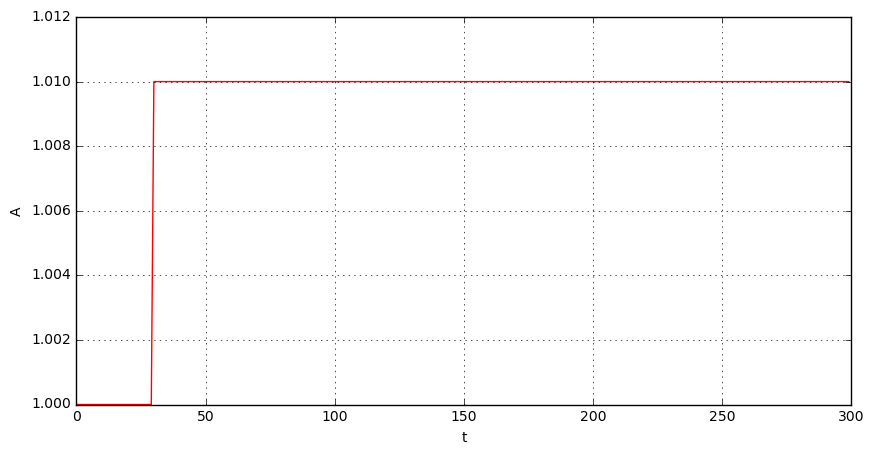

In [161]:
t = range(300) # How much of our solution we want to view in the plots the solution is of length t_sol_length

t_before_shock = int(size(t) * 0.1)

A_path = [A1]*size(t);
A_jump_path = concatenate(([Astart]*t_before_shock, A_path), axis=0);

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(t, A_jump_path[:size(t)], 'r')
ax1.set_xlabel('t')
ax1.set_ylabel('A')
ax1.grid()

In [162]:
SS_Astart_ar = squeeze(asarray(SS_Astart))

C_jump_solution = concatenate(([SS_Astart_ar[0]]*t_before_shock, C_solution), axis=0)
e_jump_solution = concatenate(([SS_Astart_ar[1]]*t_before_shock, e_solution), axis=0)
K_jump_solution = concatenate(([SS_Astart_ar[2]]*t_before_shock, K_solution), axis=0)
n_jump_solution = concatenate(([SS_Astart_ar[3]]*t_before_shock, n_solution), axis=0)

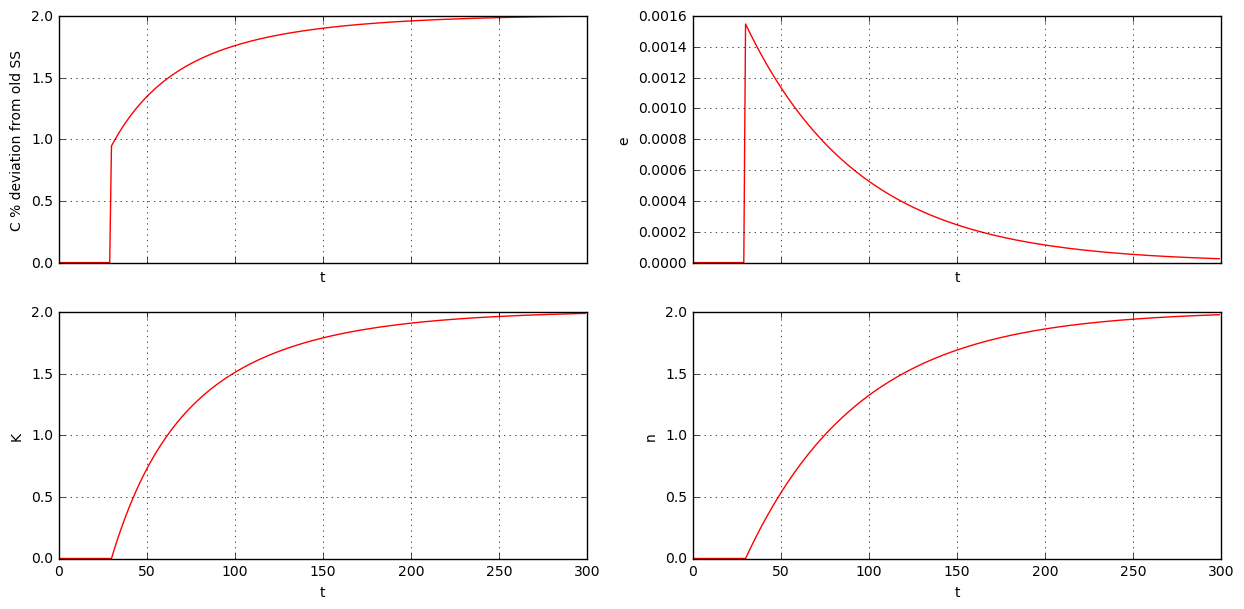

In [163]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex='col', figsize=(15,7))

ax1.plot(t, (C_jump_solution[:size(t)]/C_jump_solution[0]-1.0)*100, 'r')
ax1.set_xlabel('t')
ax1.set_ylabel('C % deviation from old SS')
ax1.grid()

ax2.plot(t, e_jump_solution[:size(t)], 'r')
ax2.set_xlabel('t')
ax2.set_ylabel('e')
ax2.grid()

ax3.plot(t, (K_jump_solution[:size(t)]/K_jump_solution[0]-1.0)*100, 'r')
ax3.set_xlabel('t')
ax3.set_ylabel('K')
ax3.grid()

ax4.plot(t, (n_jump_solution[:size(t)]/n_jump_solution[0]-1.0)*100, 'r')
ax4.set_xlabel('t')
ax4.set_ylabel('n')
ax4.grid()

## Dynamics Discussion
All the variables begin below their steady state level and converge to a new higher steady state level. The initial posisiton is chosen to be one that corresponds to steady-state under a different technology. Notably $C,K,n$ change by the same amount, this reflects that capital per firm $\frac{K}{n}$ and consumption per firm $\frac{C}{n}$ are independent of $A$ in steady-state. Therefore an equal change in the denominator and numerator leads to no overall effect.

Entry ($e$) measures the slope of the $n$ trajectory, and is not in % deviation from steady state. Dynamic barriers to entry $\gamma$ control this slope, entry will be slower when barriers to entry are higher, and the resulting $e$ and $n$ slopes will be shallower -- convergence takes longer. 

# Labour Behaviour
With logarithmic consumption $\sigma =1$ labour is fixed in the long run. The % deviation in labor is maximized when Frisch elasticity is made infinite, so inverse Frisch elasticity is zero, that is $\eta=0$ in this model. This corresponds to indivisble labor and maximum sensitivity of labor.

In [164]:
L_jump_solution = concatenate(([SS_Astart_ar[4]]*t_before_shock, L_solution), axis=0)

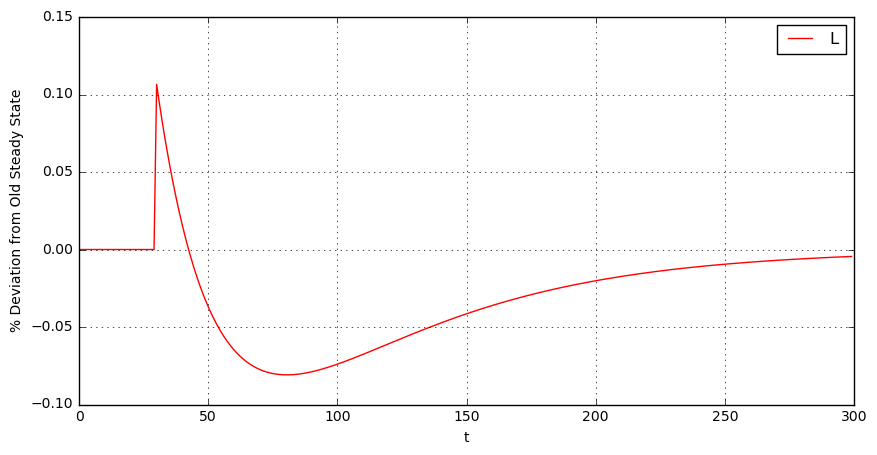

In [165]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(t, (L_jump_solution[:size(t)]/L_jump_solution[0]-1.0)*100, 'r', label='L')
ax1.set_xlabel('t')
ax1.set_ylabel('% Deviation from Old Steady State')
ax1.grid()
ax1.legend(loc='best')

On impact labor jumps up initially because it responds without the effects of number of firms and capital adjusting as they are fixed on impact. Therefore the only effects on $L_A(0)|^*$ are the direct effect and the consumption effect. According to the consumption plots, consumption jumps up on impact, so it decreases labor and opposes the labor enhancing direct effect of a new technology. For example:

* Initially we have  \begin{align}  L^{old *} = \left( \frac{(1 - \zeta)A^{old}\beta}{\xi}  \times \frac{K^{*old \alpha} n^{* old 1-(\alpha+\beta)}}{ C^{* old\sigma}}\right)^{\frac{1}{1+\eta-\beta}} \end{align} (where I have split into two terms to understand more easily what is changing as after the initial shock the first term remains fixed)

* Then the period ($t=0$) the shock takes place $A$ jumps to its new permanent level $C$ jumps to the stable manifold, whilst $K^*, n^*$ remain at their initial levels at the old steady state \begin{align}  L(0, A^{new}) = \left( \frac{(1 - \zeta)A^{new}\beta}{\xi } \times \frac{K^{*old \alpha}  n^{* old 1-(\alpha+\beta)}}{C(0)^{\sigma}}\right)^{\frac{1}{1+\eta-\beta}} \end{align} This means $L$ will jump up if the shift in $A$ outweighs the jump in $C$ i.e. $\frac{A^{new}}{C(0)^\sigma} > \frac{A^{*old}}{C^{*old\sigma}} \implies \frac{A^{new}}{A^{*old}} > \frac{C(0)^\sigma}{C^{*old\sigma}}  $.

* Finally after the initial shock has taken place (infinitesimally later $\Delta$) and $C$ has jumped accordingly (and $e$ too) then $K,n$ adjust. Since all $C,K,n$ are increasing according to simulation then whether $L$ increases of decreases depends on whether the increase in the denominator is stronger than the increase in the numerator \begin{align}  L(\Delta, A^{new}) = \left( \frac{(1 - \zeta)A^{new}\beta}{\xi } \times \frac{K(\Delta)^{\alpha}  n(\Delta)^{1-(\alpha+\beta)}}{C(\Delta)^{\sigma}}\right)^{\frac{1}{1+\eta-\beta}} \end{align} so if $C^\sigma$ in the denominator is increasing at a faster rate than the combined $K^{\alpha}  n^{1-(\alpha+\beta)}$ effect in the numerator then $L$ will decrease.

* At the point where the denominator and numerator changes cancel out $L$ will be unchaging for a period (i.e. there will be a hump shape). Therefore our $\cup$-shaped impulse response in labour represents that consumption (the denominator effect) initially dominates the numerator effect leading to declining $L$ but after some time the reverse happens and labour starts to increase because the rising $K,n$ outweighs the rising consumption. In other words consumption is dominant initially whereas capital and number of firms dominate finally. This can be observed in the panel of impulse responses by noting the $C$ response is steeper (after the initial jump) than the $K,n$ responses initially, but as it approaches steady-state it is shallower.

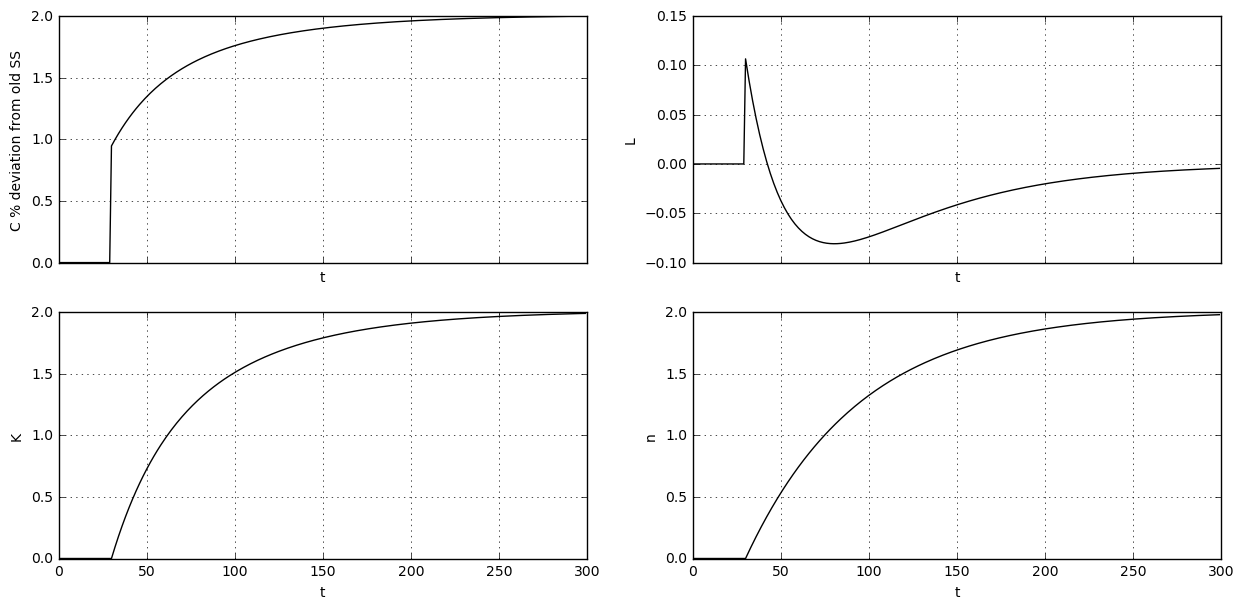

In [166]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex='col', figsize=(15,7))


ax1.plot(t, (C_jump_solution[:size(t)]/C_jump_solution[0]-1.0)*100, 'k')
ax1.set_xlabel('t')
ax1.set_ylabel('C % deviation from old SS')
ax1.grid()

ax2.plot(t, (L_jump_solution[:size(t)]/L_jump_solution[0]-1.0)*100, 'k', label='L')
ax2.set_xlabel('t')
ax2.set_ylabel('L')
ax2.grid()

ax3.plot(t, (K_jump_solution[:size(t)]/K_jump_solution[0]-1.0)*100, 'k')
ax3.set_xlabel('t')
ax3.set_ylabel('K')
ax3.grid()

ax4.plot(t, (n_jump_solution[:size(t)]/n_jump_solution[0]-1.0)*100, 'k')
ax4.set_xlabel('t')
ax4.set_ylabel('n')
ax4.grid()

# Excess Capacity Utilization

Notice that % variation in $y(t)$  relative to steady state is synonymous to variation in capacity utilization $\frac{y(t)}{y^e}$ in percentage deviation from steady state terms since $y^e$ is a fixed level independent of $A$. (i.e. % variation in capacity utilization and output per firm are equivalent).

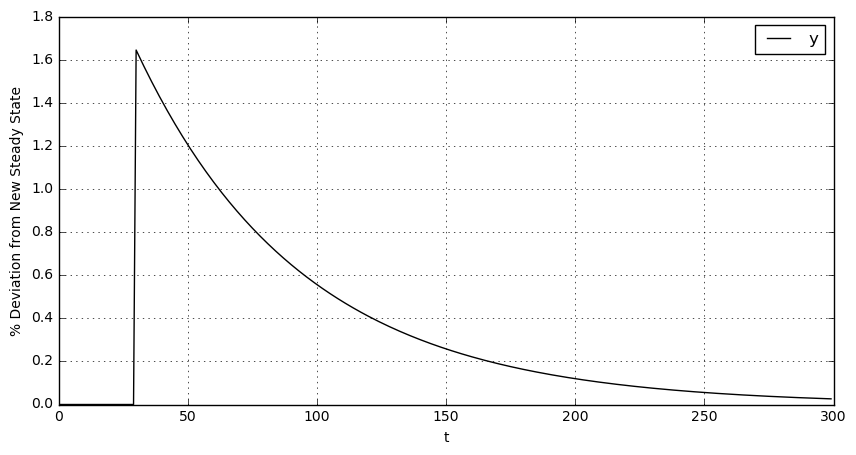

In [167]:
y_solution = A1 * (K_solution/n_solution)**alpha1 * (L_solution/n_solution)**beta1 - phi1
y_ss = ((alpha1 + beta1) * (1-zeta1) * phi1) / (1-(1-zeta1)*(alpha1+beta1))
y_jump_solution = concatenate(([y_ss]*t_before_shock, y_solution), axis=0)



fig, ax1 = plt.subplots(figsize=(10, 5))
#ax1.plot(t, y_solution[:size(t)], 'k', label='y')
ax1.plot(t, (y_jump_solution[:size(t)]/y_jump_solution[0]-1.0)*100, 'k', label='y')

ax1.set_xlabel('t')
ax1.set_ylabel('% Deviation from New Steady State')
ax1.legend()

ax1.grid()

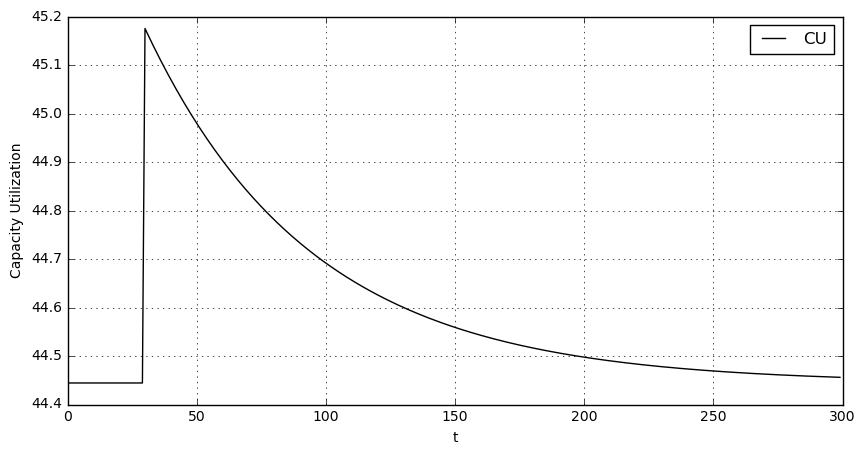

In [168]:
y_e = (phi1 * (alpha1+beta1)) / (1-(alpha1+beta1))
capacity_jump_solution = y_jump_solution/y_e

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(t, (capacity_jump_solution[:size(t)])*100, 'k', label='CU')

ax1.set_xlabel('t')
ax1.set_ylabel('Capacity Utilization')
ax1.legend()
ax1.grid()

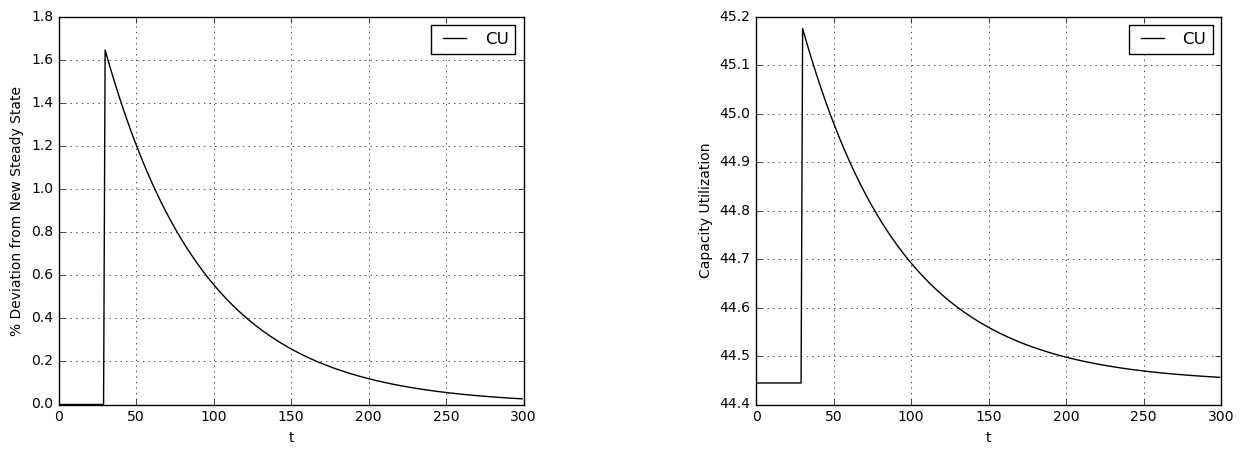

In [169]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t, (y_jump_solution[:size(t)]/y_jump_solution[0]-1.0)*100, 'k', label='CU')
ax1.set_xlabel('t')
ax1.set_ylabel('% Deviation from New Steady State')
ax1.grid()
ax1.legend(loc='best')


ax2.plot(t, (capacity_jump_solution[:size(t)])*100, 'k', label='CU')
ax2.set_xlabel('t')
ax2.set_ylabel('Capacity Utilization')
ax2.legend()
ax2.grid()

# Productivity Behaviour
A positive shock to technology $A=1$ to $A=1.01$ causes measured productivity to overshoot its long-run level, as the main theorem in the paper explains. But as firms begin to enter to arbitrage profits productivity falls because resources are divided among more firms so they benefit less from returns to scale. A larger Lerner Index $\zeta$ strengthen the effect, and it is nonexistant with $\zeta \to 0$ since this reflects perfect competition (this observation is a Corollary in the paper).

In [170]:
meas_prod_A1 = (A1 * (K_solution/n_solution)**alpha1 * (L_solution/n_solution)**beta1 
                - phi1)/((K_solution/n_solution)**alpha1 * (L_solution/n_solution)**beta1)**(1/(alpha1+beta1))

In [171]:
Prod_jump_solution = concatenate(([Prod_SS_Astart]*t_before_shock, meas_prod_A1), axis=0)

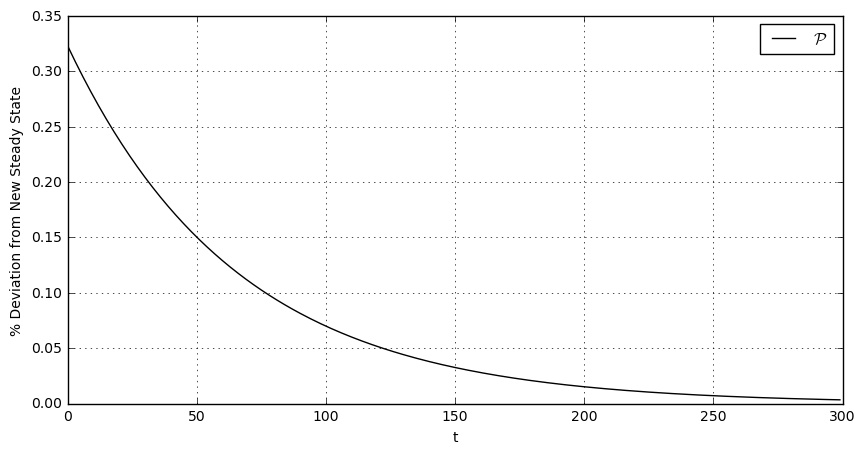

In [172]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(t, (meas_prod_A1[:size(t)]/meas_prod_A1[-1]-1.0)*100, 'k', label='$\mathcal{P}$')
ax1.set_xlabel('t')
ax1.set_ylabel('% Deviation from New Steady State')
ax1.legend()
ax1.grid()

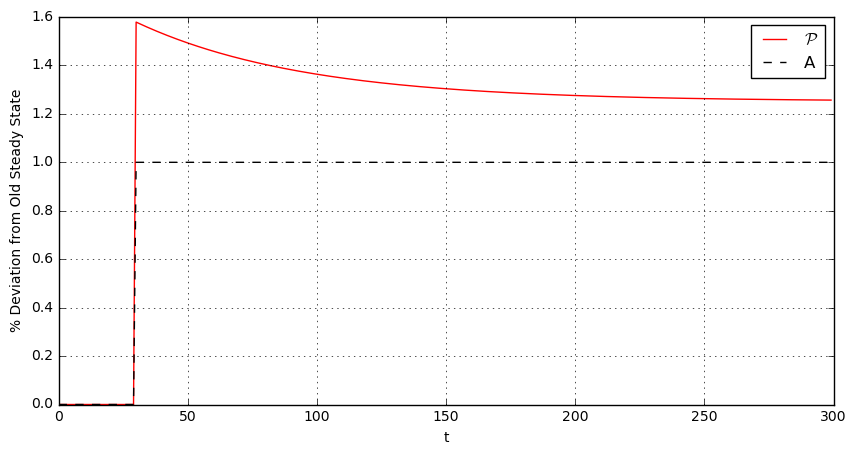

In [173]:
fig, ax1 = plt.subplots(figsize=(10, 5));

ax1.plot(t, (Prod_jump_solution[:size(t)]/Prod_jump_solution[0]-1.0)*100, 'r', label='$\mathcal{P}$')
ax1.plot(t, (A_jump_path[:size(t)]/A_jump_path[0]-1.0)*100, 'k--', label='A')
ax1.set_xlabel('t')
ax1.set_ylabel('% Deviation from Old Steady State')
ax1.grid()
ax1.legend(loc='best')

## Comparing Across $\ze$

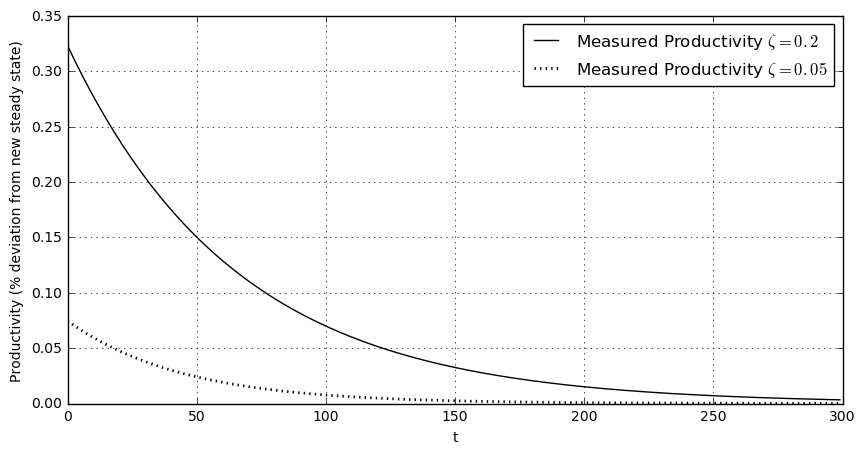

In [174]:
# Run the model with zeta=0 and uncomment the below. Then recomment it and run for the case you are interested
# in and use savedperfectcompprod to plot a benchmark.
#savedperfectcompprod = meas_prod_A1
#savedlowmarkupprod = meas_prod_A1


# Percentage deviation from long-run steady state
meas_prod_A1 = (A1 * (K_solution/n_solution)**alpha1 * (L_solution/n_solution)**beta1 
                - phi1)/((K_solution/n_solution)**alpha1 * (L_solution/n_solution)**beta1)**(1/(alpha1+beta1))
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(t, (meas_prod_A1[:size(t)]/meas_prod_A1[-1]-1.0)*100, 'k', label="Measured Productivity $\zeta = 0.2$")
ax1.plot(t, (savedlowmarkupprod[:size(t)]/savedlowmarkupprod[-1]-1.0)*100, 'k:', linewidth=2, 
          label="Measured Productivity $\zeta = 0.05$")
# ax1.plot(t, (savedperfectcompprod[:size(t)]/savedperfectcompprod[-1]-1.0)*100, 'r--', linewidth=2,
#          label="Measured Productivity $\zeta = 0$")
ax1.set_xlabel('t')
ax1.set_ylabel('Productivity (% deviation from new steady state)')
ax1.legend()
ax1.grid()

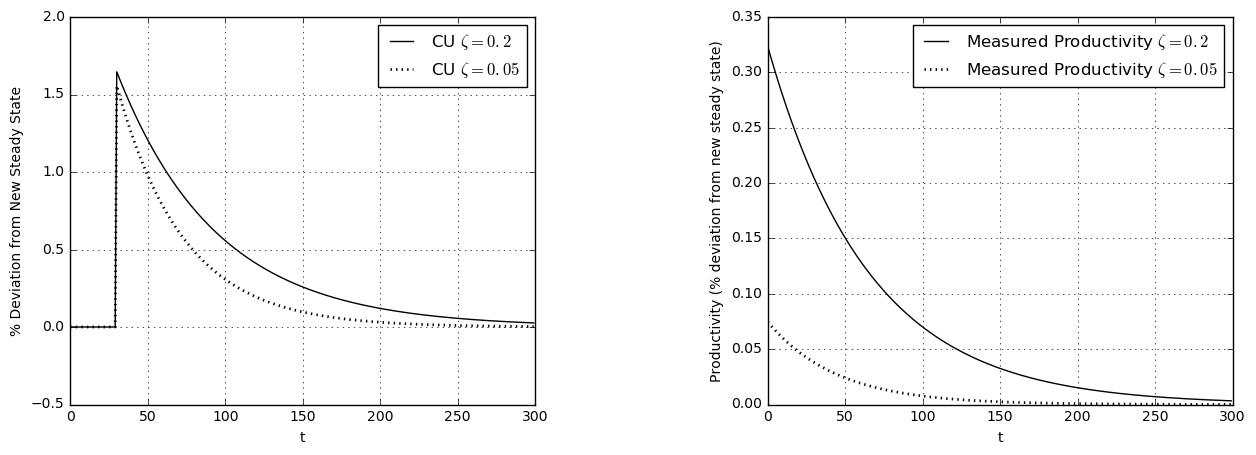

In [179]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#y_jump_solution_low = y_jump_solution # Uncomment this and run with a low markup, and then recomment and run with high markup

ax1.plot(t, (y_jump_solution[:size(t)]/y_jump_solution[0]-1.0)*100, 'k', label='CU $\zeta = 0.2$')
ax1.plot(t, (y_jump_solution_low[:size(t)]/y_jump_solution_low[-1]-1.0)*100, 'k:', label='CU $\zeta = 0.05$', linewidth=2)
ax1.set_xlabel('t')
ax1.set_ylabel('% Deviation from New Steady State')
ax1.grid()
ax1.legend(loc='best')


ax2.plot(t, (meas_prod_A1[:size(t)]/meas_prod_A1[-1]-1.0)*100, 'k', label="Measured Productivity $\zeta = 0.2$")
ax2.plot(t, (savedlowmarkupprod[:size(t)]/savedlowmarkupprod[-1]-1.0)*100, 'k:', linewidth=2, 
          label="Measured Productivity $\zeta = 0.05$")
# ax1.plot(t, (savedperfectcompprod[:size(t)]/savedperfectcompprod[-1]-1.0)*100, 'r--', linewidth=2,
#          label="Measured Productivity $\zeta = 0$")
ax2.set_xlabel('t')
ax2.set_ylabel('Productivity (% deviation from new steady state)')
ax2.legend()
ax2.grid()

# Stable Manifold Plot
The phase plot shows the trajectory of capital and number of firms that arises from the technology change. It begins at the `Astart` steady state and finishes at `A1`. If we were to plot from many different start points it would show a full phase plot with all the directions of motion of trajectories. With all ending up at the `A1` equilibrium. This would be the diagrammatic representation of our solution.

Notably the capital/number of firms ratio (i.e. capital per firm) is unchanged. This captures the result that steady state capital per firm is not a function of $A$.

In [176]:
n_ss_plot = arange(0.99 * SS_Astart[3], 1.01 * SS_A1[3], 0.001)
K_ss_plot = n_ss_plot * (phi1 * alpha1 * (1 - zeta1))/((1- (1 - zeta1) * (alpha1 + beta1)) * rho1) 

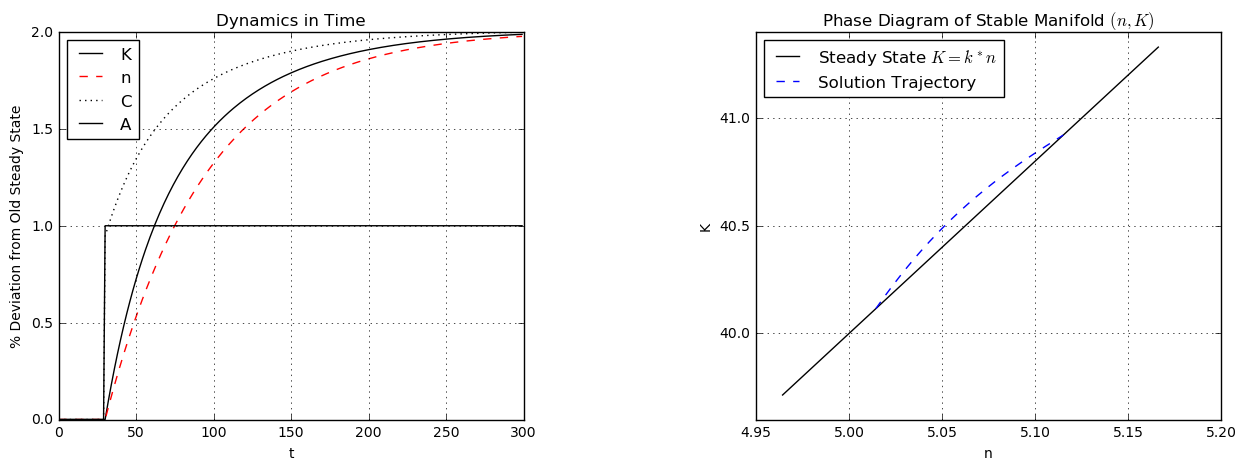

In [177]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t, (K_jump_solution[:size(t)]/K_jump_solution[0]-1.0)*100, 'k', label='K')
ax1.plot(t, (n_jump_solution[:size(t)]/n_jump_solution[0]-1.0)*100, 'r--', label='n')
ax1.plot(t, (C_jump_solution[:size(t)]/C_jump_solution[0]-1.0)*100, 'k:', label='C')
ax1.plot(t, (A_jump_path[:size(t)]/A_jump_path[0]-1.0)*100, 'k', label='A')

ax1.set_xlabel('t')
ax1.set_ylabel('% Deviation from Old Steady State')
ax1.set_title("Dynamics in Time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(n_ss_plot, K_ss_plot, 'k', label='Steady State $K=k^* n$')
ax2.plot(n_solution, K_solution,'--', label='Solution Trajectory')
ax2.set_xlabel("n")
ax2.set_ylabel("K")  
ax2.set_title("Phase Diagram of Stable Manifold $(n,K)$")
ax2.grid()
ax2.legend(loc='best')

The left panel shows that capital responds faster than number of firms, but number of firms catches up in the long-run. We control for this by calibrating the $\gamma$ parameter sufficiently high. This can also be understood in the phase plot, which shows a trajectory where during transition captial per firm is always higher (above the steady state line) but in the long-run it returns to its initial level. The reason that the trajectory is above rather than below the steady state line is because capital moves faster than firms. Making firm adjustment very cheap $\gamma \to 0$ would overcome this result, and the trajectory would approach from below the steady-state line. However, it seems plausible that capital moves faster than firms, see emerging literaute by Clementi, Palazzo, Peifan Wu (2017).

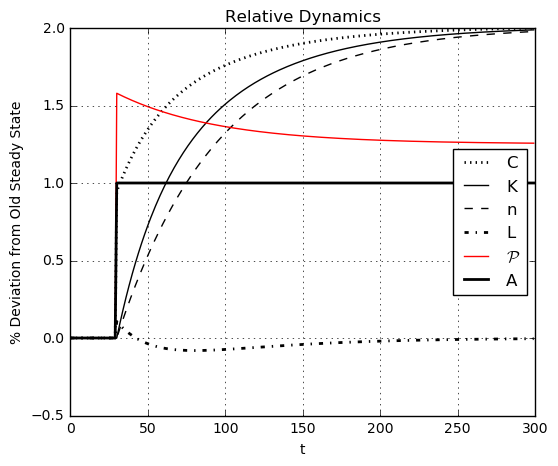

In [178]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax1.plot(t, (C_jump_solution[:size(t)]/C_jump_solution[0]-1.0)*100, 'k:', label='C', linewidth=2)
#ax1.plot(t, e_jump_solution[:size(t)], 'g', label='e')
ax1.plot(t, (K_jump_solution[:size(t)]/K_jump_solution[0]-1.0)*100, 'k', label='K')
ax1.plot(t, (n_jump_solution[:size(t)]/n_jump_solution[0]-1.0)*100, 'k--', label='n')
ax1.plot(t, (L_jump_solution[:size(t)]/L_jump_solution[0]-1.0)*100, 'k-.', label='L', linewidth=2)
ax1.plot(t, (Prod_jump_solution[:size(t)]/Prod_jump_solution[0]-1.0)*100, 'r', label='$\mathcal{P}$')
ax1.plot(t, (A_jump_path[:size(t)]/A_jump_path[0]-1.0)*100, 'k', label='A', linewidth=2)


ax1.set_xlabel('t')
ax1.set_ylabel('% Deviation from Old Steady State')
ax1.set_title("Relative Dynamics")
ax1.grid()
ax1.legend(loc='right')